In [1]:
import string

import numpy as np
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hack4tahsin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('spam_ham_dataset.csv')

In [4]:
df['text'] = df['text'].apply(lambda x: x.replace('\r\n', ''))

In [5]:
df.text.iloc[2]

"Subject: neon retreatho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potentia

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


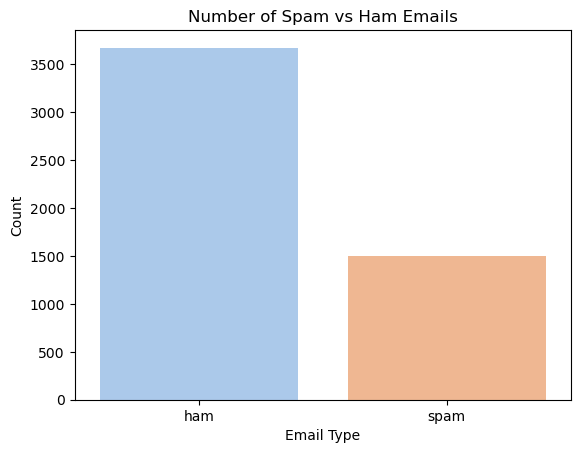

In [6]:
# Check label column name
print(df.columns)

# If the label column is named 'label' or 'label_name', adjust accordingly
label_col = 'label' if 'label' in df.columns else 'label_name'

# Plot
sns.countplot(data=df, x=label_col, palette='pastel')
plt.title('Number of Spam vs Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

In [7]:
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words('english'))

for i in range(len(df)):
    text = df['text'].iloc[i].lower()
    text = text.translate(str.maketrans('', '', string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = ''.join(text)
    corpus.append(text)

In [8]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()
y = df.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [10]:
clf.score(X_test, y_test)

0.6946859903381642

In [11]:
email_to_classify = df.text.values[10]

In [12]:
email_to_classify

"Subject: vocable % rnd - word asceticismvcsc - brand new stock for your attentionvocalscape inc - the stock symbol is : vcscvcsc will be our top stock pick for the month of april - stock expected tobounce to 12 cents levelthe stock hit its all time low and will bounce backstock is going to explode in next 5 days - watch it soarwatch the stock go crazy this and next week .breaking news - vocalscape inc . announces agreement to resell mix networkservicescurrent price : $ 0 . 025we expect projected speculative price in next 5 days : $ 0 . 12we expect projected speculative price in next 15 days : $ 0 . 15vocalscape networks inc . is building a company that ' s revolutionizing thetelecommunications industry with the most affordable phone systems , hardware ,online software , and rates in canada and the us . vocalscape , a company withglobal reach , is receiving international attention for the development of voiceover ip ( voip ) application solutions , including the award - winning eyefont

In [13]:
email_text = email_to_classify.lower().translate(str.maketrans('', '', string.punctuation)).split()
email_text = [stemmer.stem(word) for word in text if word not in stopwords_set]
email_text = ''.join(email_text)

email_corpus = [email_text]

X_email = vectorizer.transform(email_corpus)

<Figure size 600x600 with 0 Axes>

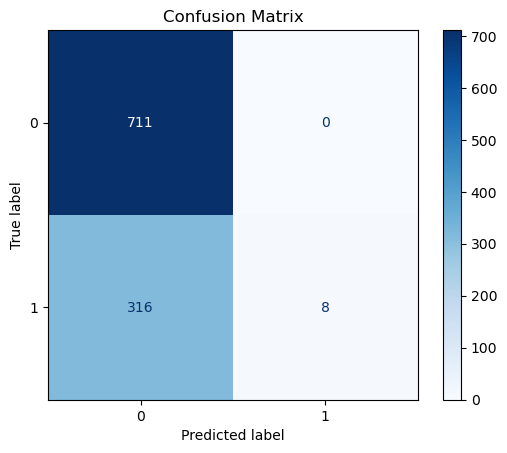

In [18]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [15]:
df.label_num.iloc[10]

1